<a href="https://colab.research.google.com/github/Rishant-gupta/Music_recommendation_system/blob/task_begin/music_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [64]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [65]:
#irrelevant columns
df.drop(['Unnamed: 0', 'album_name'], axis=1, inplace=True)

In [66]:
#columns left after removing irrelvent cols
df.head()

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [68]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [69]:
#checking for missing values
df.isnull().sum()

,0
track_id,0
artists,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


filling missing value
numerical-->mean
catogorical-->mode

In [70]:
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [71]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [72]:
df.isnull().sum()


,0
track_id,0
artists,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [73]:
#shape before cleaning
df.shape

(114000, 19)

In [74]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


slecting column with dattype float and int

In [75]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

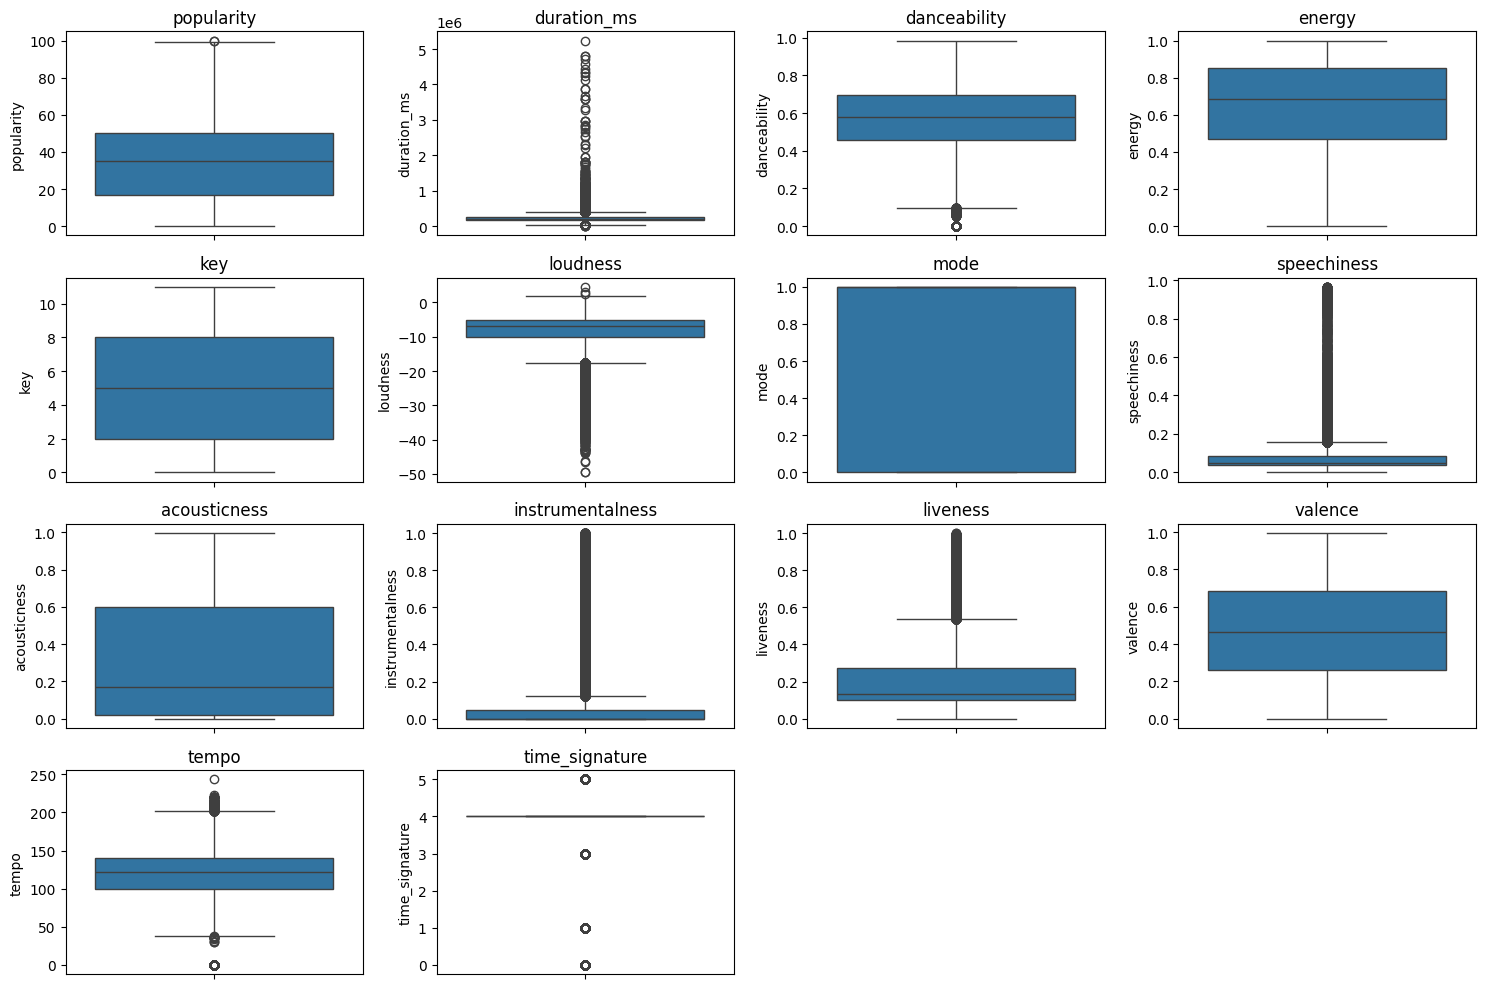

In [76]:
#boxplot to check outliears
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#  Handling Outliers

In [77]:
#Capping
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


In [78]:
#Trimming
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


In [84]:
#beafore stand scal
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,114000.0
mean,1.106951e-16,1.635495e-16,-6.681595e-17,2.333572e-16,-8.900483e-17,-1.216649e-16,-3.989012e-17,3.251045e-16,2.632748e-16,-1.595605e-16,-9.573628e-17,-5.584617e-17,4.517556e-16,0.0
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0
min,-1.490186e+00,-2.455628e+00,-2.715300e+00,-2.549946e+00,-1.491343e+00,-2.389199e+00,-1.326281e+00,-1.580947e+00,-9.470374e-01,-6.066788e-01,-1.396867e+00,-1.828544e+00,-2.832133e+00,0.0
25%,-7.280233e-01,-6.622847e-01,-6.420225e-01,-6.734152e-01,-9.295412e-01,-5.161239e-01,-1.326281e+00,-7.361491e-01,-8.962136e-01,-6.066788e-01,-7.005124e-01,-8.256896e-01,-7.720064e-01,0.0
50%,7.897231e-02,-1.312275e-01,7.509423e-02,1.734091e-01,-8.683787e-02,2.338539e-01,7.539880e-01,-4.302333e-01,-4.387992e-01,-6.058632e-01,-4.589199e-01,-3.883451e-02,-5.548616e-03,0.0
75%,7.514686e-01,5.332776e-01,7.401622e-01,8.453026e-01,7.558655e-01,7.325929e-01,7.539880e-01,4.075054e-01,8.513439e-01,3.539877e-01,5.429787e-01,8.058776e-01,6.014115e-01,0.0
max,2.970707e+00,2.326621e+00,2.417290e+00,1.425755e+00,1.598569e+00,2.605668e+00,7.539880e-01,2.122987e+00,2.048260e+00,1.794987e+00,2.408215e+00,2.009303e+00,2.661539e+00,0.0


In [82]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

After std scal

In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           114000 non-null  object 
 2   track_name        114000 non-null  object 
 3   popularity        114000 non-null  float64
 4   duration_ms       114000 non-null  float64
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  float64
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  float64
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [86]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,114000.0
mean,1.106951e-16,1.635495e-16,-6.681595e-17,2.333572e-16,-8.900483e-17,-1.216649e-16,-3.989012e-17,3.251045e-16,2.632748e-16,-1.595605e-16,-9.573628e-17,-5.584617e-17,4.517556e-16,0.0
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0
min,-1.490186e+00,-2.455628e+00,-2.715300e+00,-2.549946e+00,-1.491343e+00,-2.389199e+00,-1.326281e+00,-1.580947e+00,-9.470374e-01,-6.066788e-01,-1.396867e+00,-1.828544e+00,-2.832133e+00,0.0
25%,-7.280233e-01,-6.622847e-01,-6.420225e-01,-6.734152e-01,-9.295412e-01,-5.161239e-01,-1.326281e+00,-7.361491e-01,-8.962136e-01,-6.066788e-01,-7.005124e-01,-8.256896e-01,-7.720064e-01,0.0
50%,7.897231e-02,-1.312275e-01,7.509423e-02,1.734091e-01,-8.683787e-02,2.338539e-01,7.539880e-01,-4.302333e-01,-4.387992e-01,-6.058632e-01,-4.589199e-01,-3.883451e-02,-5.548616e-03,0.0
75%,7.514686e-01,5.332776e-01,7.401622e-01,8.453026e-01,7.558655e-01,7.325929e-01,7.539880e-01,4.075054e-01,8.513439e-01,3.539877e-01,5.429787e-01,8.058776e-01,6.014115e-01,0.0
max,2.970707e+00,2.326621e+00,2.417290e+00,1.425755e+00,1.598569e+00,2.605668e+00,7.539880e-01,2.122987e+00,2.048260e+00,1.794987e+00,2.408215e+00,2.009303e+00,2.661539e+00,0.0
